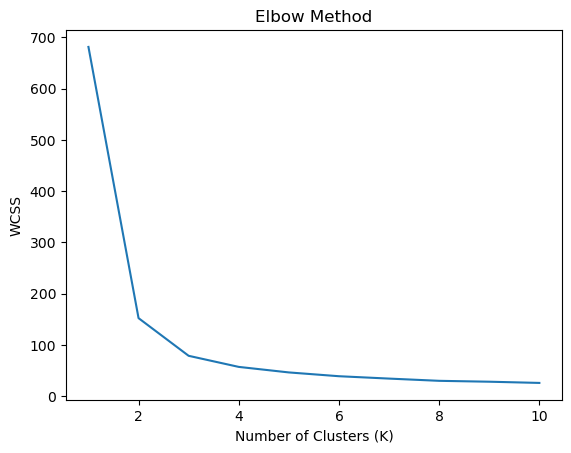

In [4]:
from sklearn.datasets import load_iris
iris = load_iris()
data = iris.data
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.show()
optimal_k = 3  
kmeans_optimal = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans_optimal.fit(data)

labels = kmeans_optimal.labels_

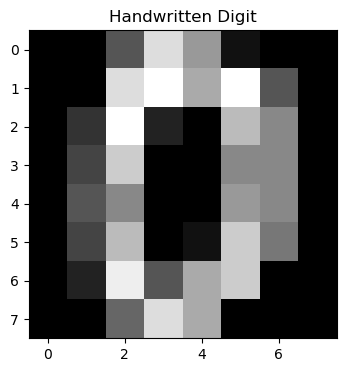

Variance explained by PC1: 0.12
Variance explained by PC2: 0.10


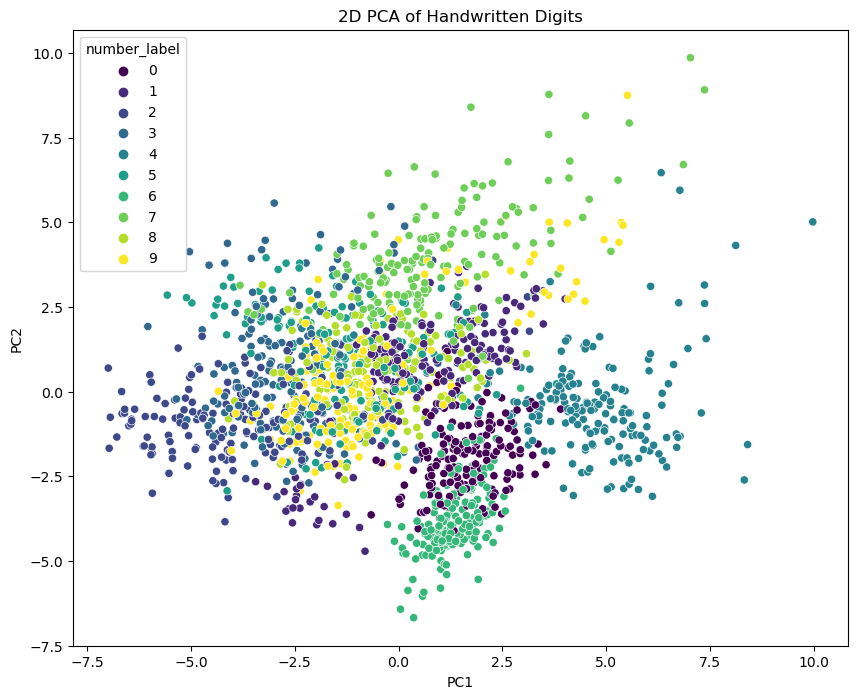

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

digits = pd.read_csv('digits.csv')

pixels = digits.drop('number_label', axis=1)

single_image_row = pixels.iloc[0]

image_array = np.array(single_image_row)

image_matrix = image_array.reshape(8, 8)

plt.figure(figsize=(4, 4))
plt.imshow(image_matrix, cmap='gray')  
plt.title("Handwritten Digit")
plt.show()

scaler = StandardScaler()
pixels_scaled = scaler.fit_transform(pixels)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(pixels_scaled)

explained_variance_ratio = pca.explained_variance_ratio_
print(f"Variance explained by PC1: {explained_variance_ratio[0]:.2f}")
print(f"Variance explained by PC2: {explained_variance_ratio[1]:.2f}")

pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df['number_label'] = digits['number_label']

plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='number_label', data=pca_df, palette='viridis', legend='full')
plt.title('2D PCA of Handwritten Digits')
plt.show()
